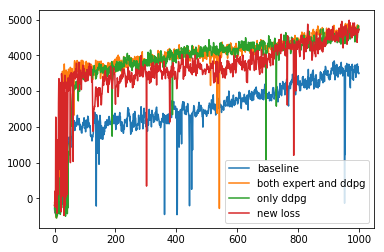

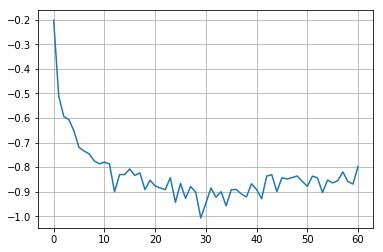

In [382]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

log_file0 = './logs/HalfCheetah-v1/train_newer_expert_data/gym_eval.monitor.csv'
log_file1 = './logs/HalfCheetah-v1/newer_expert_data_with_both_expert_and_ddpg_actor_loss/gym_eval.monitor.csv'
log_file2 = './logs/HalfCheetah-v1/newer_expert_data_with_only_ddpg_actor_loss/gym_eval.monitor.csv'
#log_file3 = './logs/HalfCheetah-v1/newer_expert_data_with_only_expert_actor_loss/gym_eval.monitor.csv'
log_file3 = './logs/HalfCheetah-v1/2017-12-27-23-28-50-405643/gym_eval.monitor.csv'

data0 = pandas.read_csv(log_file0, index_col=None, comment='#')
data0 = data0['r']
data1 = pandas.read_csv(log_file1, index_col=None, comment='#')
data1 = data1['r']
data2 = pandas.read_csv(log_file2, index_col=None, comment='#')
data2 = data2['r']
data3 = pandas.read_csv(log_file3, index_col=None, comment='#')
data3 = data3['r']
plt.plot(data0)
plt.plot(data1)
plt.plot(data2)
plt.plot(data3)
plt.legend(['baseline', 'both expert and ddpg', 'only ddpg', 'new loss'])#, 'only expert'])
plt.show()


log_file0 = './logs/HalfCheetah-v1/2017-12-27-23-28-50-405643/progress.csv'

data0 = pandas.read_csv(log_file0, index_col=None, comment='#')
#print(data0)
lc = data0['train/dist'].values
#la = data0['train/loss_actor'].values
#print(lc)
plt.plot(lc)
#plt.plot(la)
#plt.legend(['critic', 'actor'])#, 'only expert'])
plt.grid()
plt.show()

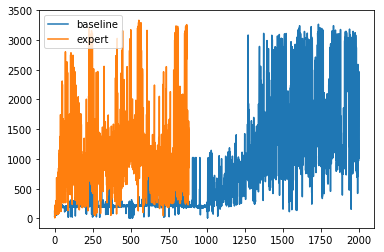

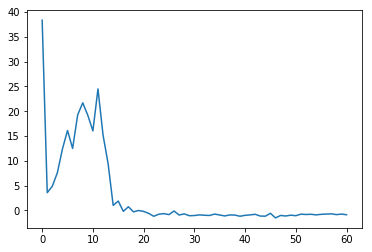

In [381]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

log_file0 = './logs/Hopper-v1/2017-12-28-10-53-30-733018/gym_eval.monitor.csv'
log_file1 = './logs/Hopper-v1/training_baseline/first/gym_eval.monitor.csv'
log_file2 = './logs/Hopper-v1/training_baseline/second/gym_eval.monitor.csv'

data0 = pandas.read_csv(log_file0, index_col=None, comment='#')
data1 = pandas.read_csv(log_file1, index_col=None, comment='#')
data2 = pandas.read_csv(log_file2, index_col=None, comment='#')
data3 = pandas.concat([data1, data2])

x_expert = np.cumsum(data0['l'].values)
x_1 = np.cumsum(data1['l'].values)
x_2 = np.cumsum(data2['l'].values)
x_base = np.concatenate([x_1,x_2+1e6])
r_base = np.concatenate([data1['r'].values, data2['r'].values])

plt.plot(x_base/1000, r_base)
plt.plot(x_expert/1000, data0['r'])
plt.legend(['baseline', 'expert'])#, 'only expert'])
plt.show()

log_file0 = './logs/Hopper-v1/2017-12-28-10-53-30-733018/progress.csv'

data0 = pandas.read_csv(log_file0, index_col=None, comment='#')
#print(data0)
#lc = data0['train/loss_critic'].values
#la = data0['train/loss_actor'].values
ld = data0['train/dist'].values
plt.plot(ld)
#plt.plot(la)
#plt.legend(['critic', 'actor'])#, 'only expert'])
plt.show()